In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [42]:
df = pd.read_csv("C:/Users/user/Downloads/baseball_players.csv")
df

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [43]:
df.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [44]:
df = df.dropna()
df.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

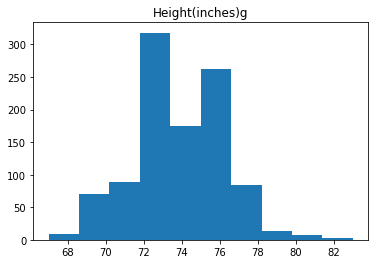

In [45]:
df.describe()
plt.hist(df['Height(inches)'])
plt.title('Height(inches)g')
plt.show()

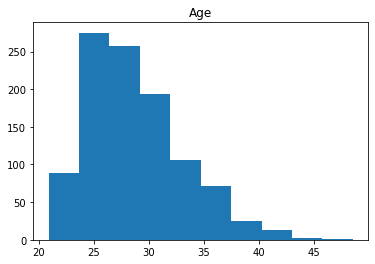

In [46]:
df.describe()
plt.hist(df['Age'])
plt.title('Age')
plt.show()

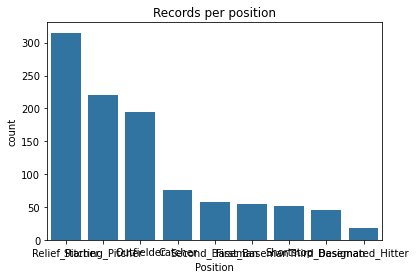

In [47]:
sns.countplot(x = "Position", data = df, palette = [sns.color_palette()[0]],

              order = df.Position.value_counts().index)

plt.title("Records per position");

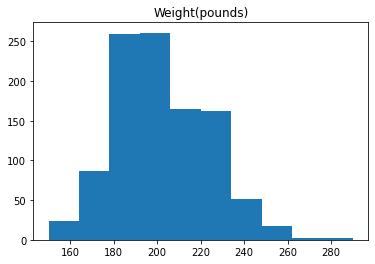

In [48]:
df.describe()
plt.hist(df['Weight(pounds)'])
plt.title('Weight(pounds)')
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Position']=le.fit_transform(df['Position'])

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14500\1704715669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position']=le.fit_transform(df['Position'])


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,2,72,210.0,35.43
4,Chris_Gomez,BAL,2,73,188.0,35.71


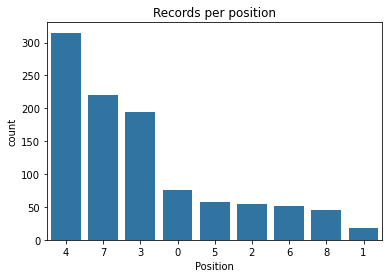

In [50]:
sns.countplot(x = "Position", data = df, palette = [sns.color_palette()[0]],

              order = df.Position.value_counts().index)

plt.title("Records per position");

In [51]:
x = df[["Height(inches)", "Weight(pounds)", "Age"]]
x.head()

,Height(inches),Weight(pounds),Age
0,74,180.0,22.99
1,74,215.0,34.69
2,72,210.0,30.78
3,72,210.0,35.43
4,73,188.0,35.71


In [52]:
y = df["Position"]
y.head()

0    0
1    0
2    0
3    2
4    2
Name: Position, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size = 0.2, random_state=42)

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state=42)

In [54]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, Y_train)

pred_dt = clf_dt.predict(X_test)
cm_dt = confusion_matrix(Y_test, pred_dt)
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(Y_test, pred_dt))
print (confusion_matrix(Y_test, pred_dt))


--- Decision Tree Classifier ---
0.24154589371980675
[[ 4  0  0  1  7  1  1  3  2]
 [ 0  0  0  2  3  0  0  1  0]
 [ 1  0  1  3  3  2  0  0  1]
 [ 1  0  1  8  8  6  4  7  2]
 [ 5  0  3  8 18  4  4 15  2]
 [ 0  0  1  1  0  3  3  1  0]
 [ 0  0  0  2  4  2  0  1  0]
 [ 1  0  0 11 19  1  0 15  3]
 [ 0  0  0  0  1  3  0  2  1]]


In [55]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, Y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
cm_svm = confusion_matrix(Y_test, pred_svm)
print(accuracy_score(Y_test, pred_svm))
print(confusion_matrix(Y_test, pred_svm))


--- SVM Classifier ---
0.28502415458937197
[[ 0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0]]


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, Y_train)
pred = rf_clf.predict(X_test)
cm_rf = confusion_matrix(Y_test, pred)
print(accuracy_score(Y_test,pred))
print (confusion_matrix(Y_test, pred))


--- Radom Forest ---
0.2318840579710145
[[ 4  0  1  2  6  1  1  2  2]
 [ 0  0  0  2  2  0  0  2  0]
 [ 1  0  1  4  3  2  0  0  0]
 [ 2  0  0  9 12  3  2  7  2]
 [ 3  0  1 12 20  2  2 18  1]
 [ 0  0  1  2  1  3  2  0  0]
 [ 0  0  0  3  2  3  0  1  0]
 [ 1  0  1 12 24  0  0 11  1]
 [ 0  0  0  1  1  1  1  3  0]]


In [57]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, Y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
cm_nn = confusion_matrix(Y_test, pred_nn)
print (accuracy_score(Y_test, pred_nn))
print (confusion_matrix(Y_test, pred_nn))


--- Neural Network Classifier ---
0.23671497584541062
[[ 0  0  0  0  9  0  0 10  0]
 [ 0  0  1  0  5  0  0  0  0]
 [ 0  0  1  0  6  0  0  4  0]
 [ 0  0  1  0 24  0  2 10  0]
 [ 0  0  0  0 37  0  5 17  0]
 [ 0  0  0  0  7  0  0  2  0]
 [ 0  0  0  0  4  0  1  4  0]
 [ 0  0  0  0 39  0  1 10  0]
 [ 0  0  0  0  6  0  0  1  0]]


In [58]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, Y_train)

pred_lr = clf_lr.predict(X_test)
cm_lr = confusion_matrix(Y_test, pred_lr)
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_lr))
print (confusion_matrix(Y_test, pred_lr))


--- Logistic Regression Classifier ---
0.28019323671497587
[[ 0  0  0  0 19  0  0  0  0]
 [ 0  0  1  0  5  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0]
 [ 0  0  0  2 34  1  0  0  0]
 [ 0  0  0  1 56  0  2  0  0]
 [ 0  0  0  1  8  0  0  0  0]
 [ 0  0  0  1  8  0  0  0  0]
 [ 0  0  0  3 47  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0]]


In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
ly_preds = lr.predict(x_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.154503063742222


In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.3423797467001246


In [63]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.1446603773522015


In [64]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

sry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(sry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.22900172067014
